In [1]:
#import pandas, numpy, os, matplotlib, seaborn, scrpy libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r'C:\Users\joelf\OneDrive\Documents\CareerFoundry\4 Python\Instacart Data'

In [2]:
#import data
custs_ords = pd.read_pickle(os.path.join(path, 'NewDataSets', 'orders_products_customers_combined.pkl'))
days_labeled = pd.read_csv(os.path.join(path, 'NewDataSets','weekday.csv'))

In [3]:
custs_ords.shape

(32404859, 32)

In [4]:
custs_ords = custs_ords.merge(days_labeled, on = 'orders_day_of_week', how = 'left')
custs_ords.shape

(32404859, 33)

In [5]:
pd.options.display.max_columns = None
custs_ords.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,repeat_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,two_busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_order_freq,freq_flag,gender,state,age,date_joined,num_dpdnts,marital_status,income,_merge,day
0,2539329,1,1,2,8,NaN,0,196,1,0,Soda,77,7,9.0,mid_range product,normal day,normal day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday
1,2398795,1,2,3,7,15.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
2,473747,1,3,3,12,21.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
3,2254736,1,4,4,7,29.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday
4,431534,1,5,4,15,28.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday


In [6]:
custs_ords['day'].value_counts()

Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: day, dtype: int64

In [7]:
#clear prices over 100, bad data
custs_ords.loc[custs_ords['prices'] > 100, 'prices'] = np.nan
custs_ords['prices'].max()

25.0

Text(0.5, 1.0, 'Num of Orders by Day of Week')

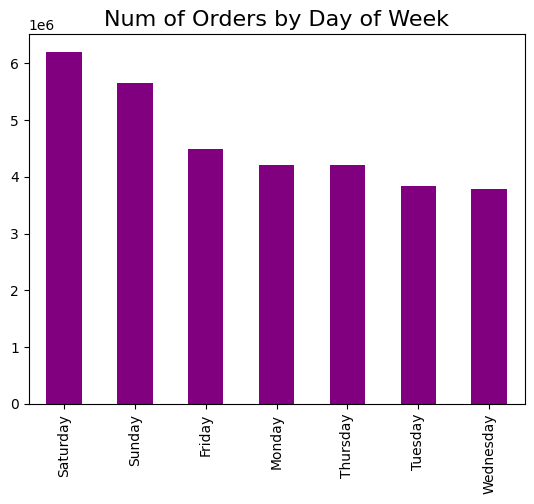

In [8]:
#2 bar chart
bar_orders_dow = custs_ords['day'].value_counts().plot.bar(color = ['purple'])
plt.title('Num of Orders by Day of Week', fontsize = 16)

<AxesSubplot: ylabel='Frequency'>

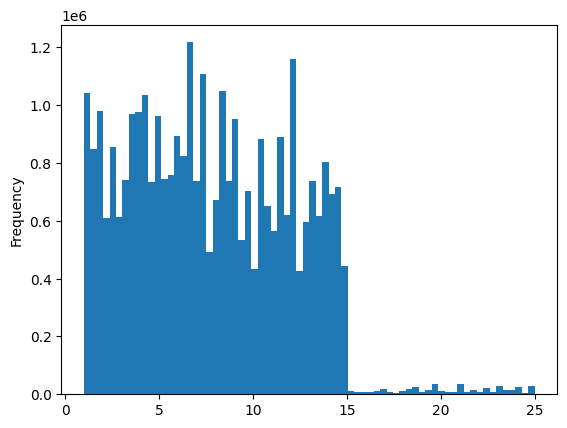

In [9]:
#2 historgram
custs_ords['prices'].plot.hist(bins = 70)

<AxesSubplot: xlabel='prices', ylabel='prices'>

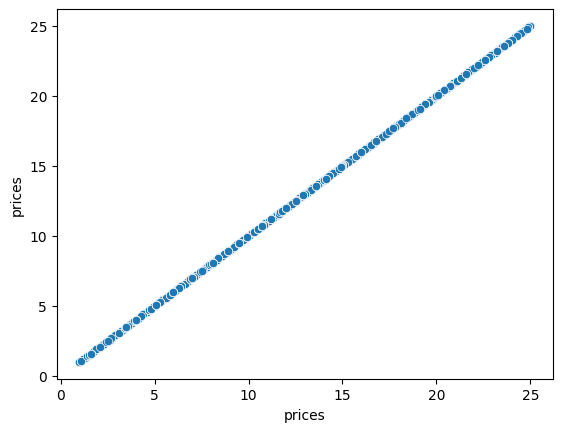

In [10]:
#2 scatter plot
sns.scatterplot(x = 'prices', y = 'prices', data = custs_ords)

In [11]:
#2 line chart from sample
#create and check sample
np.random.seed(4)
dev = np.random.rand(len(custs_ords)) <= .7
big = custs_ords[dev]
small = custs_ords[~dev]
len(custs_ords) - (len(big)+len(small))

0

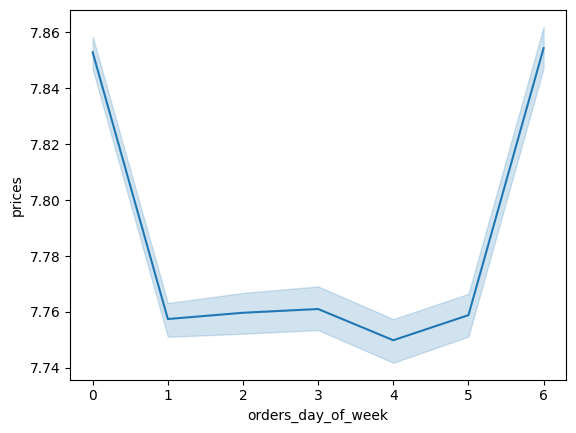

In [12]:
tempdf = small[['orders_day_of_week', 'prices']]
line = sns.lineplot(data = tempdf, x = 'orders_day_of_week', y='prices')

In [13]:
custs_ords.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,repeat_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,two_busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_order_freq,freq_flag,gender,state,age,date_joined,num_dpdnts,marital_status,income,_merge,day
0,2539329,1,1,2,8,NaN,0,196,1,0,Soda,77,7,9.0,mid_range product,normal day,normal day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday
1,2398795,1,2,3,7,15.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
2,473747,1,3,3,12,21.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
3,2254736,1,4,4,7,29.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday
4,431534,1,5,4,15,28.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday


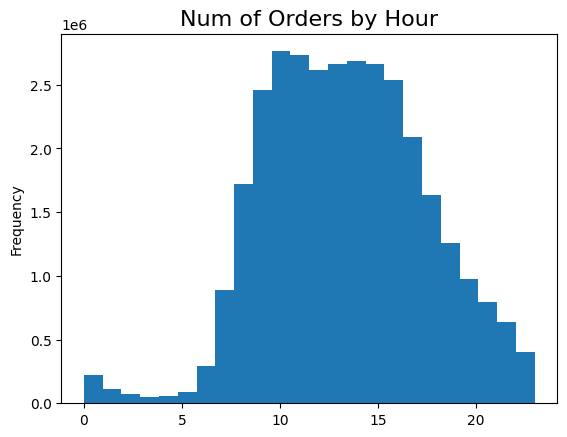

In [14]:
#3 histogram of order hour of day
hist_ordertime = custs_ords['order_time'].plot.hist(bins = 24)
plt.title('Num of Orders by Hour', fontsize = 16)
plt.legend('', frameon = False)

The histogram represents the number of orders per hour of the day on Instacart. Its clear that the busiest times are between 10:00 and 16:00 with very few orders happening between midnight and 6:00.

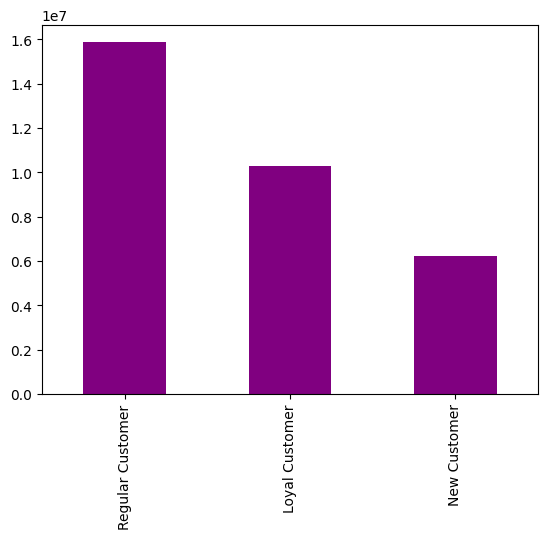

In [15]:
#4 loyalty flag bar
bar_loyalty = custs_ords['loyalty_flag'].value_counts().plot.bar(color = ['purple'])

In [16]:
#5 line chart: price vs hour of day
#make sample
np.random.seed(7)
samp = np.random.rand(len(custs_ords)) <= .7
big = custs_ords[samp]
small = custs_ords[~samp]
len(custs_ords) - (len(big)+len(small))

0

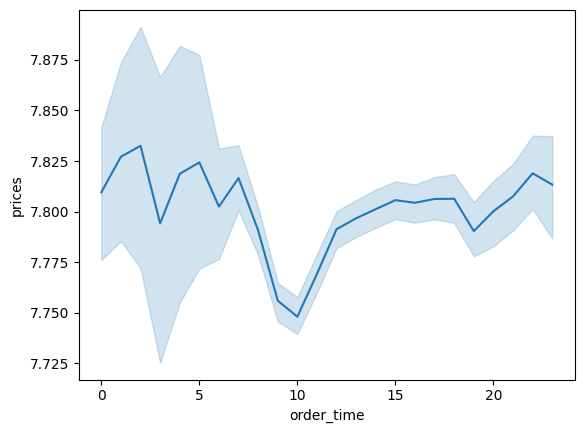

In [17]:
#5
#create line chart
q5_df = small[['order_time', 'prices']]
linechart_ordertime_prices = sns.lineplot(data = q5_df, x = 'order_time', y='prices')

The most profitable orders are happening in the early morning, which is when the fewest amount of orders are happening. The time with the most orders, around 10:00, is the time customers are spending the least

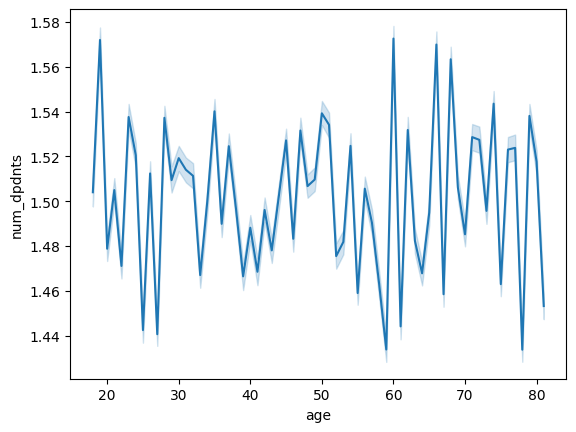

In [18]:
#6 line chart: age vs dep
q6_df = small[['age', 'num_dpdnts']]
linechart_age_numdep = sns.lineplot(data = q6_df, x ='age', y='num_dpdnts')

There is no clear trend between age and number of dependents

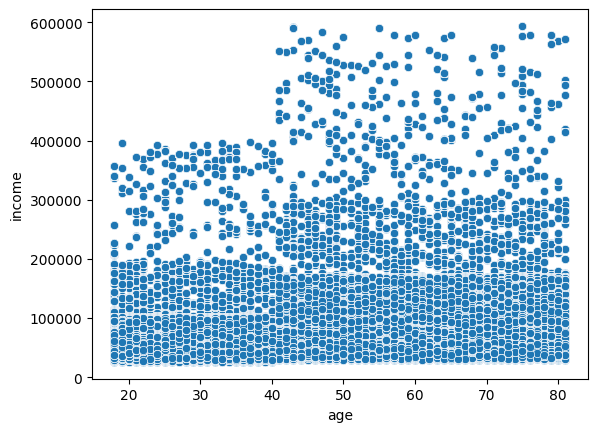

In [19]:
#7 scatterplot: age vs income
q7_df = small[['age', 'income']]
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = q7_df)

There is no clear relationship between age and income

In [20]:
#8 Export vis
bar_orders_dow.figure.savefig(os.path.join(path, 'NewDataSets', '4.9 Vis', 'bar_orders_dow.png'))
hist_ordertime.figure.savefig(os.path.join(path, 'NewDataSets', '4.9 Vis', 'hist_ordertime.png'))
bar_loyalty.figure.savefig(os.path.join(path, 'NewDataSets', '4.9 Vis', 'bar_loyalty.png'))
linechart_ordertime_prices.figure.savefig(os.path.join(path, 'NewDataSets', '4.9 Vis', 'linechart_ordertime_prices.png'))
linechart_age_numdep.figure.savefig(os.path.join(path, 'NewDataSets', '4.9 Vis', 'linechart_age_numdep.png'))
scatter_age_income.figure.savefig(os.path.join(path, 'NewDataSets', '4.9 Vis', 'scatter_age_income.png'))

In [21]:
custs_ords.to_pickle(os.path.join(path, 'NewDataSets', 'orders_products_customers_combined.pkl'))